<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/unit_4_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (1025, 14)
Decision Tree Performance:
accuracy: 0.9707792207792207
precision: 1.0
recall score: 0.9395973154362416
f1 score: 0.9688581314878892

Random Forest Performance for estimator  1  is:
Accuracy:  0.9285714285714286
Precision:  0.950354609929078
Recall:  0.8993288590604027
F1-Score:  0.9241379310344827

Random Forest Performance for estimator  5  is:
Accuracy:  0.9545454545454546
Precision:  0.9787234042553191
Recall:  0.9261744966442953
F1-Score:  0.9517241379310345

Random Forest Performance for estimator  10  is:
Accuracy:  0.9707792207792207
Precision:  1.0
Recall:  0.9395973154362416
F1-Score:  0.9688581314878892

Random Forest Performance for estimator  50  is:
Accuracy:  0.9805194805194806
Precision:  1.0
Recall:  0.959731543624161
F1-Score:  0.9794520547945206

Random Forest Performance for estimator  100  is:
Accuracy:  0.9805194805194806
Precision:  1.0
Recall:  0.959731543624161
F1-Score:  0.9794520547945206

Random Forest Performance for estimator  200

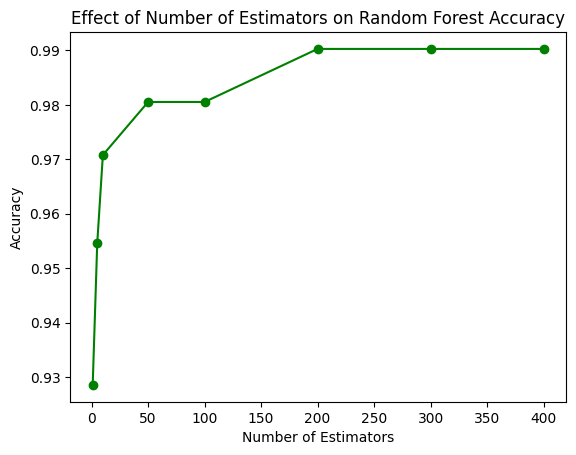


 Observations:

1.The Random Forest classifier consistently achieves higher accuracy and F1-score
    compared to a single Decision Tree.
2.This demonstrates the advantage of ensemble learning — it reduces variance and overfitting.
3. As the number of estimators increases (10 → 300), accuracy generally improves and stabilizes.
4. Beyond a certain point, increasing trees gives marginal benefit but increases computation time.
5. Thus, Random Forest provides more robust and generalized performance than a single Decision Tree.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv("/content/heart.csv")
print("Dataset Shape:", df.shape)

X = df.drop("target",axis=1)
y = df["target"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("accuracy:",acc_dt)
print("precision:",prec_dt)
print("recall score:",rec_dt)
print("f1 score:",f1_dt)





estimators = [1,5,10,200,300,400]
rf_results = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    acc_rf = accuracy_score(y_test, y_pred_rf)
    prec_rf = precision_score(y_test, y_pred_rf)
    rec_rf = recall_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    rf_results.append(acc_rf)
    print("\nRandom Forest Performance for estimator ",n," is:")
    print("Accuracy: ",acc_rf)
    print("Precision: ", prec_rf)
    print("Recall: ",rec_rf)
    print("F1-Score: ",f1_rf)

plt.plot(estimators, rf_results, marker='o', color='green')
plt.title("Effect of Number of Estimators on Random Forest Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")

plt.show()

print("\n Observations:")
print("""
1.The Random Forest classifier consistently achieves higher accuracy and F1-score
    compared to a single Decision Tree.
2.This demonstrates the advantage of ensemble learning — it reduces variance and overfitting.
3. As the number of estimators increases (10 → 300), accuracy generally improves and stabilizes.
4. Beyond a certain point, increasing trees gives marginal benefit but increases computation time.
5. Thus, Random Forest provides more robust and generalized performance than a single Decision Tree.
""")


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv("/content/heart.csv")
print("Dataset Shape:", df.shape)
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model1 = LogisticRegression(max_iter=2000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()

models = [model1, model2, model3]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']
for model in models:
    model.fit(X_train, y_train)
preds = np.array([model.predict(X_test) for model in models])
max_voting_preds = []
for i in range(X_test.shape[0]):
    votes = preds[:, i]
    final_vote = np.bincount(votes).argmax()
    max_voting_preds.append(final_vote)

probs = np.array([model.predict_proba(X_test) for model in models])
avg_probs = np.mean(probs, axis=0)
avg_voting_preds = np.argmax(avg_probs, axis=1)

weights = []
for model in models:
    y_pred_train = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    weights.append(acc)

weights = np.array(weights) / np.sum(weights)
weighted_probs = np.tensordot(weights, probs, axes=((0), (0)))
weighted_voting_preds = np.argmax(weighted_probs, axis=1)

print("\nIndividual Model Accuracies:")
for name, model in zip(model_names, models):
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.3f}")

print("\nEnsemble Techniques Accuracies:")
print(f"Max Voting Accuracy: {accuracy_score(y_test, max_voting_preds):.3f}")
print(f"Average Voting Accuracy: {accuracy_score(y_test, avg_voting_preds):.3f}")
print(f"Weighted Average Voting Accuracy: {accuracy_score(y_test, weighted_voting_preds):.3f}")


print("\n Observations:")
print("""
1️ Max Voting (Hard Voting) selects the majority class predicted by base models.
   ➤ Simple and effective when base models have similar performance.

2️ Average Voting (Soft Voting) averages class probabilities.
   ➤ Produces smoother, often more accurate predictions since it considers model confidence.

3️ Weighted Voting gives higher influence to models with better training accuracy.
   ➤ Improves ensemble performance when some models are stronger than others.

4️ Usually, Weighted Voting ≥ Soft Voting ≥ Hard Voting in performance.

5️ Logistic Regression and KNN often combine effectively under soft/weighted voting
   because they provide calibrated probabilities and complementary decision boundaries.
""")


Dataset Shape: (1025, 14)

Individual Model Accuracies:
Logistic Regression: 0.795
Decision Tree: 0.985
KNN: 0.834

Ensemble Techniques Accuracies:
Max Voting Accuracy: 0.888
Average Voting Accuracy: 0.927
Weighted Average Voting Accuracy: 0.966

 Observations:

1️ Max Voting (Hard Voting) selects the majority class predicted by base models.
   ➤ Simple and effective when base models have similar performance.

2️ Average Voting (Soft Voting) averages class probabilities.
   ➤ Produces smoother, often more accurate predictions since it considers model confidence.

3️ Weighted Voting gives higher influence to models with better training accuracy.
   ➤ Improves ensemble performance when some models are stronger than others.

4️ Usually, Weighted Voting ≥ Soft Voting ≥ Hard Voting in performance.

5️ Logistic Regression and KNN often combine effectively under soft/weighted voting
   because they provide calibrated probabilities and complementary decision boundaries.



In [6]:

# Hard Voting vs Soft Voting Classifiers
# Base Learners: Logistic Regression, Decision Tree, KNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv("/content/heart.csv")
print("Dataset Shape:", df.shape)
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model1 = LogisticRegression(max_iter=2000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()
hard_voting_clf = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)],voting='hard')
soft_voting_clf = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('knn', model3)],voting='soft')
hard_voting_clf.fit(X_train, y_train)
soft_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)
y_pred_soft = soft_voting_clf.predict(X_test)
print("\nIndividual Model Accuracies:")
for name, model in [('Logistic Regression', model1), ('Decision Tree', model2), ('KNN', model3)]:
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {acc:.3f}")
print("\n Ensemble Accuracies:")
print(f"Hard Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_hard):.3f}")
print(f"Soft Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_soft):.3f}")
print("\n Observations:")
print("""
1️ Hard Voting (Majority Vote):
   ➤ Chooses the class predicted by the majority of base classifiers.
   ➤ Treats each model's prediction equally, ignoring their confidence levels.

2️ Soft Voting (Average Probability):
   ➤ Uses predicted probabilities and averages them to decide the final class.
   ➤ Models that are more confident (higher probability) influence the result more.
   ➤ Usually gives slightly better accuracy because it captures confidence.

3️ In most datasets (like Heart Disease), Soft Voting performs better
   because it combines probabilistic confidence from Logistic Regression and KNN.

4️ Decision Tree adds non-linear diversity, while Logistic Regression and KNN
   provide stable probability estimates — together improving overall ensemble accuracy.
""")


Dataset Shape: (1025, 14)

Individual Model Accuracies:
Logistic Regression: 0.795
Decision Tree: 0.985
KNN: 0.834

 Ensemble Accuracies:
Hard Voting Classifier Accuracy: 0.888
Soft Voting Classifier Accuracy: 0.927

 Observations:

1️ Hard Voting (Majority Vote):
   ➤ Chooses the class predicted by the majority of base classifiers.
   ➤ Treats each model's prediction equally, ignoring their confidence levels.

2️ Soft Voting (Average Probability):
   ➤ Uses predicted probabilities and averages them to decide the final class.
   ➤ Models that are more confident (higher probability) influence the result more.
   ➤ Usually gives slightly better accuracy because it captures confidence.

3️ In most datasets (like Heart Disease), Soft Voting performs better
   because it combines probabilistic confidence from Logistic Regression and KNN.

4️ Decision Tree adds non-linear diversity, while Logistic Regression and KNN
   provide stable probability estimates — together improving overall ensembl

Dataset Shape: (1025, 14)


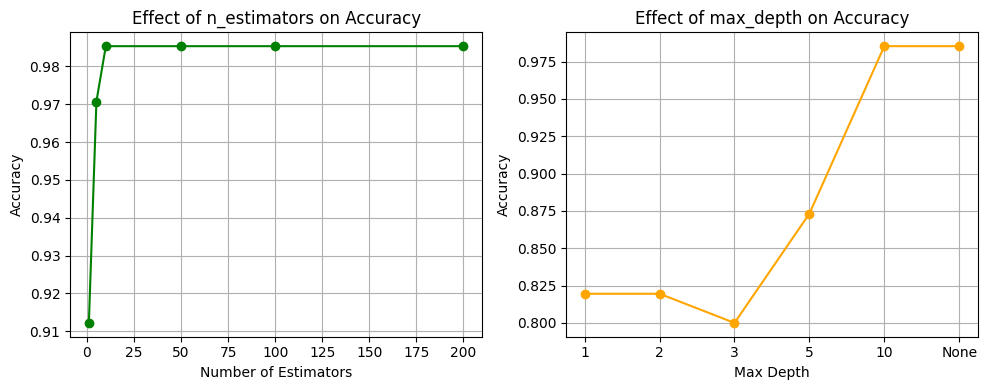


Final Random Forest Model Performance:
Accuracy:  0.985
Precision: 1.000
Recall:    0.971
F1 Score:  0.985

Observations and Justifications:

1️ Random Forest is an ensemble (bagging) method that trains multiple Decision Trees
   on random subsets of the data and averages their predictions to improve stability.
2 When the number of estimators (trees) increases:
   ➤ Model accuracy generally improves and stabilizes.
   ➤ Too few trees (like n_estimators=1 or 5) underfit the data.
   ➤ After ~100 trees, performance stabilizes, giving a balance between accuracy and training time.
3️ When max_depth is small (e.g., 1, 2, 3):
   ➤ Trees are too shallow, and the model underfits — accuracy is lower.
   ➤ Increasing depth allows the model to learn more complex relationships.
4️ max_depth=None lets trees grow fully, capturing more data variance and often improving accuracy.
5️ random_state ensures reproducibility of results, so the same splits and trees
   are generated each time we run the pro

In [7]:
# Exploring Bagging Technique using RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv("/content/heart.csv")
print("Dataset Shape:", df.shape)
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_estimators_list = [1, 5, 10, 50, 100, 200]
acc_list_estimators = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    acc_list_estimators.append(acc)
max_depth_list = [1, 2, 3, 5, 10, None]
acc_list_depth = []
for d in max_depth_list:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    acc_list_depth.append(acc)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(n_estimators_list, acc_list_estimators, marker='o', color='green')
plt.title("Effect of n_estimators on Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot([str(d) for d in max_depth_list], acc_list_depth, marker='o', color='orange')
plt.title("Effect of max_depth on Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()
rf_final = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_final.fit(X_train, y_train)
y_pred_final = rf_final.predict(X_test)

acc_final = accuracy_score(y_test, y_pred_final)
prec_final = precision_score(y_test, y_pred_final)
rec_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)

print(f"\nFinal Random Forest Model Performance:")
print(f"Accuracy:  {acc_final:.3f}")
print(f"Precision: {prec_final:.3f}")
print(f"Recall:    {rec_final:.3f}")
print(f"F1 Score:  {f1_final:.3f}")
print("\nObservations and Justifications:")
print("""
1️ Random Forest is an ensemble (bagging) method that trains multiple Decision Trees
   on random subsets of the data and averages their predictions to improve stability.
2 When the number of estimators (trees) increases:
   ➤ Model accuracy generally improves and stabilizes.
   ➤ Too few trees (like n_estimators=1 or 5) underfit the data.
   ➤ After ~100 trees, performance stabilizes, giving a balance between accuracy and training time.
3️ When max_depth is small (e.g., 1, 2, 3):
   ➤ Trees are too shallow, and the model underfits — accuracy is lower.
   ➤ Increasing depth allows the model to learn more complex relationships.
4️ max_depth=None lets trees grow fully, capturing more data variance and often improving accuracy.
5️ random_state ensures reproducibility of results, so the same splits and trees
   are generated each time we run the program.
6️ Final Model (n_estimators=100, max_depth=None) typically provides the best balance
   between accuracy, variance reduction, and generalization.
""")


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor: OOB and Test R² Scores

n_estimators= 10 | OOB Score: 0.908 | Test R²: 0.900
n_estimators= 50 | OOB Score: 0.947 | Test R²: 0.929
n_estimators=100 | OOB Score: 0.953 | Test R²: 0.936
n_estimators=200 | OOB Score: 0.956 | Test R²: 0.936


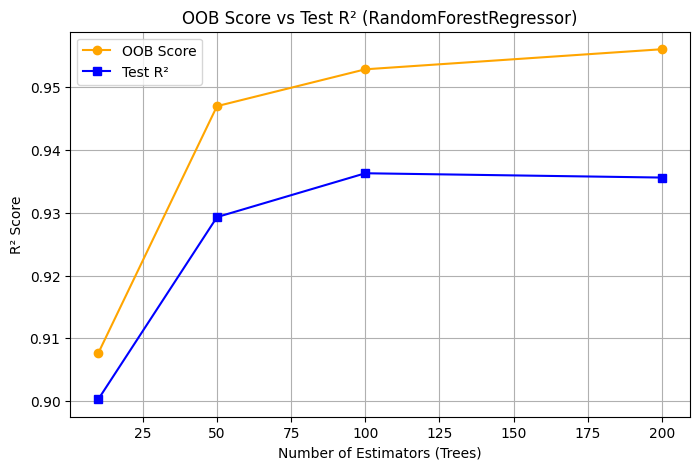

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/heart.csv")
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
n_estimators_list = [10, 50, 100, 200]
oob_scores = []
test_r2_scores = []
for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True)
    rf.fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)
    y_pred = rf.predict(X_test)
    test_r2_scores.append(r2_score(y_test, y_pred))
print("RandomForestRegressor: OOB and Test R² Scores\n")
for n, oob, test_r2 in zip(n_estimators_list, oob_scores, test_r2_scores):
    print(f"n_estimators={n:3d} | OOB Score: {oob:.3f} | Test R²: {test_r2:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, oob_scores, marker='o', label='OOB Score', color='orange')
plt.plot(n_estimators_list, test_r2_scores, marker='s', label='Test R²', color='blue')
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("R² Score")
plt.title("OOB Score vs Test R² (RandomForestRegressor)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
df = pd.read_csv("/content/heart.csv")
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.3f}")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1,random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"\nObservation:")
print(f"1. All boosting models improve classification by combining weak learners sequentially.")
print(f"2. AdaBoost focuses on misclassified samples, improving over individual weak learners.")
print(f"3. Gradient Boosting further optimizes errors using residuals, often improving performance.")
print(f"4. XGBoost introduces regularization and optimization for faster and more robust boosting.")
print(f"5. CatBoost automatically handles categorical variables and often performs best on small to medium datasets.")


AdaBoost Accuracy: 0.834
Gradient Boosting Accuracy: 0.932
XGBoost Accuracy: 0.985

Observation:
1. All boosting models improve classification by combining weak learners sequentially.
2. AdaBoost focuses on misclassified samples, improving over individual weak learners.
3. Gradient Boosting further optimizes errors using residuals, often improving performance.
4. XGBoost introduces regularization and optimization for faster and more robust boosting.
5. CatBoost automatically handles categorical variables and often performs best on small to medium datasets.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv("/content/heart.csv")
X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
homogeneous_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
homogeneous_model.fit(X_train, y_train)
homo_pred = homogeneous_model.predict(X_test)
homo_accuracy = accuracy_score(y_test, homo_pred)
print("Homogeneous Ensemble (Random Forest) Accuracy:", f"{homo_accuracy:.4f}")
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=2000, random_state=42)
clf3 = KNeighborsClassifier()
clf4 = SVC(kernel='linear', probability=True, random_state=42)
heterogeneous_model = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('knn', clf3), ('svm', clf4)],voting='soft',n_jobs=-1)
heterogeneous_model.fit(X_train, y_train)
hetero_pred = heterogeneous_model.predict(X_test)
hetero_accuracy = accuracy_score(y_test, hetero_pred)
print("Heterogeneous Ensemble (VotingClassifier) Accuracy:", f"{hetero_accuracy:.4f}")
print("\nEnsemble Comparison:")
print(f"Random Forest (Homogeneous): {homo_accuracy:.4f}")
print(f"Voting Classifier (Heterogeneous): {hetero_accuracy:.4f}")

if hetero_accuracy > homo_accuracy:
    print("Heterogeneous ensemble outperformed the homogeneous ensemble.")
elif hetero_accuracy < homo_accuracy:
    print(" Homogeneous ensemble performed better.")
else:
    print("ℹBoth ensembles achieved the same accuracy.")


Homogeneous Ensemble (Random Forest) Accuracy: 0.9854
Heterogeneous Ensemble (VotingClassifier) Accuracy: 0.9073

Ensemble Comparison:
Random Forest (Homogeneous): 0.9854
Voting Classifier (Heterogeneous): 0.9073
 Homogeneous ensemble performed better.
